In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split
from sklearn import impute

# Custom Linear Regression Model
<b><i>   By Danial (Completed)

In [2]:
class LinearRegression:
    def __init__(self, lr: int = 0.01, n_iters: int = 1000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.loss = None
        self.weights = None
        self.bias = None

    def fit(self, X: pd.DataFrame, y: pd.DataFrame) -> None:
        num_samples, num_features = X.shape    
        self.weights = np.random.rand(num_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias    
            MSE = np.sum(y_pred - y) ** 2 / num_samples
            dw = (1 / num_samples) * np.dot(X.T, y_pred - y)
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            self.loss = MSE
        return self

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [26]:
train_data = pd.read_csv('Dataset\\train.csv')
test_data = pd.read_csv('Dataset\\test.csv')
test_prices = pd.read_csv('Dataset\\prices.csv')  

In [27]:
# for i in train_data.columns:
#     if train_data[i].dtype == 'object':
#         train_data = train_data.drop(i, axis=1)
# train_data = train_data.drop('Id', axis=1)
print(train_data.info())
train_data = train_data[['BedroomAbvGr','BsmtFullBath','BsmtHalfBath', 'LotArea', 'HalfBath', 'FullBath', 'SalePrice']]
train_data = train_data.dropna(axis=0, how='any')
test_data = test_data[train_data.columns[:-1]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
scaler = StandardScaler()
model = LinearRegression(lr = 0.001, n_iters=50000)

x_train = train_data[train_data.columns[:-1]].values
y_train = train_data[train_data.columns[-1]].values
y_test = test_prices[test_prices.columns[-1]].values
x_test = test_data[test_data.columns].values

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print("loss", model.loss)

loss 2.4648731285044257e-13


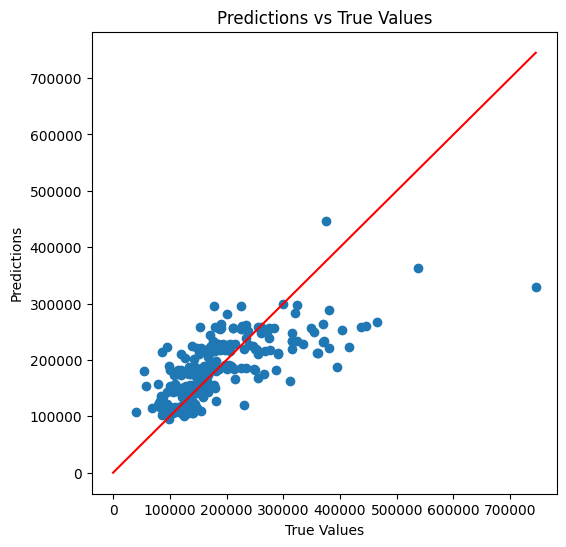

In [35]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predictions)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], color='red')
plt.title('Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [32]:
for i in range(len(predictions)):
    print("Predicted:", predictions[i], "True:", y_test[i])

Predicted: 141344.16816139684 True: 129900
Predicted: 215566.07141368714 True: 175900
Predicted: 146118.3313485016 True: 133000
Predicted: 328775.8464476291 True: 745000
Predicted: 108105.11395234213 True: 91000
Predicted: 215589.45389211585 True: 267000
Predicted: 105986.38638525821 True: 139400
Predicted: 143354.95232036657 True: 94500
Predicted: 104727.11698402606 True: 100000
Predicted: 222181.54212699964 True: 415298
Predicted: 178438.7513023607 True: 138000
Predicted: 263893.8825605399 True: 370878
Predicted: 145004.96694257142 True: 110000
Predicted: 140837.13096031165 True: 159500
Predicted: 238804.1933291993 True: 275000
Predicted: 186552.21607335453 True: 140000
Predicted: 176971.0628882458 True: 130000
Predicted: 257784.29545117804 True: 154000
Predicted: 189372.28608772866 True: 160000
Predicted: 176767.79500648152 True: 137000
Predicted: 152499.84105343267 True: 112000
Predicted: 178884.70937068388 True: 139600
Predicted: 130291.33120086521 True: 135000
Predicted: 257683.2